In [1]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6223 entries, 0 to 6222
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    6223 non-null   int64 
 1   show_id       6223 non-null   object
 2   type          6223 non-null   object
 3   title         6223 non-null   object
 4   director      4330 non-null   object
 5   cast          5654 non-null   object
 6   country       5800 non-null   object
 7   date_added    6216 non-null   object
 8   release_year  6223 non-null   int64 
 9   duration      6223 non-null   int64 
 10  description   6223 non-null   object
 11  genre         6223 non-null   object
dtypes: int64(3), object(9)
memory usage: 583.5+ KB


In [5]:
df.columns

Index(['Unnamed: 0', 'show_id', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'duration', 'description', 'genre'],
      dtype='object')

In [6]:
df.shape

(6223, 12)

In [7]:
df.head()

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,6128,s6129,TV Show,The Big Family Cooking Showdown,NaN,"Zoe Ball, Nadiya Hussain, Giorgio Locatelli, R...",United Kingdom,"February 22, 2019",2018,2,"In this unscripted series, families passionate...",British TV
1,7018,s7019,TV Show,The World's Most Extraordinary Homes,NaN,"Piers Taylor, Caroline Quentin",United Kingdom,"January 18, 2019",2019,3,Award-winning architect Piers Taylor and actre...,British TV
2,4657,s4658,TV Show,One-Punch Man,NaN,"Makoto Furukawa, Kaito Ishikawa, Yuki Kaji, Ao...",Japan,"March 20, 2017",2015,1,The most powerful superhero in the world can k...,Anime Series
3,6167,s6168,Movie,The Boy Who Harnessed the Wind,Chiwetel Ejiofor,"Maxwell Simba, Chiwetel Ejiofor, Aïssa Maïga, ...",United Kingdom,"March 1, 2019",2019,114,"Inspired by a science book, 13-year-old Willia...",Children
4,3562,s3563,Movie,"LeapFrog: Sing-along, Read-along",Ron Myrick,"Julie Maddalena, Cindy Robinson",NaN,"April 15, 2020",2011,32,"Using rhythm and rhymes, a funky band and a co...",Children


In [8]:
df.nunique()

Unnamed: 0      6223
show_id         6223
type               2
title           6223
director        3374
cast            5492
country           79
date_added      1451
release_year      69
duration         201
description     6210
genre             30
dtype: int64

In [9]:
df.isna().sum()

Unnamed: 0         0
show_id            0
type               0
title              0
director        1893
cast             569
country          423
date_added         7
release_year       0
duration           0
description        0
genre              0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df[df.director.isna()]

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,6128,s6129,TV Show,The Big Family Cooking Showdown,NaN,"Zoe Ball, Nadiya Hussain, Giorgio Locatelli, R...",United Kingdom,"February 22, 2019",2018,2,"In this unscripted series, families passionate...",British TV
1,7018,s7019,TV Show,The World's Most Extraordinary Homes,NaN,"Piers Taylor, Caroline Quentin",United Kingdom,"January 18, 2019",2019,3,Award-winning architect Piers Taylor and actre...,British TV
2,4657,s4658,TV Show,One-Punch Man,NaN,"Makoto Furukawa, Kaito Ishikawa, Yuki Kaji, Ao...",Japan,"March 20, 2017",2015,1,The most powerful superhero in the world can k...,Anime Series
8,2035,s2036,TV Show,Eurovision Song Contest,NaN,"Bar Refaeli, Erez Tal, Assi Azar, Lucy Ayoub",NaN,"July 23, 2019",2019,1,Singers from all over Europe represent their c...,International TV
11,6659,s6660,TV Show,The Mess You Leave Behind,NaN,"Inma Cuesta, Bárbara Lennie, Tamar Novas, Arón...",Spain,"December 11, 2020",2020,1,A teacher starts her job at a high school but ...,International TV
...,...,...,...,...,...,...,...,...,...,...,...,...
6194,3450,s3451,Movie,Krish Trish and Baltiboy: Part II,NaN,"Damandeep Singh Baggan, Smita Malhotra, Baba S...",NaN,"September 8, 2017",2010,58,Animal minstrels narrate stories about a monke...,Children
6196,4572,s4573,Movie,Oddbods: Party Monsters,NaN,"Nadia Ramlee, Chio Su-Ping, Jeremy Linn, Marlo...",NaN,"October 19, 2018",2018,23,"Dressed up as detective Sherlock Holmes, Slick...",Uncategorized
6198,7156,s7157,TV Show,Toradora!,NaN,"Rie Kugimiya, Junji Majima, Yui Horie, Hirofum...",Japan,"August 1, 2020",2008,1,"Menacing in appearance but gentle at heart, Ry...",Anime Series
6204,1189,s1190,TV Show,Camp X,NaN,NaN,Canada,"February 1, 2019",2014,1,"Established during World War II, North America...",Docuseries


In [14]:
df[df.show_id=='s5990']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,PG-13,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...


In [13]:
df.dropna(subset=['director', 'cast'], inplace=True)

In [14]:
df.isna().sum()

Unnamed: 0        0
show_id           0
type              0
title             0
director          0
cast              0
country         132
date_added        0
release_year      0
duration          0
description       0
genre             0
dtype: int64

In [15]:
df[df.duration.isna()]

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre


In [16]:
df.dropna(subset = ['duration'], inplace = True)

In [17]:
df.country.mode()[0]

'United States'

In [18]:
df.country = df.country.fillna(df.country.mode()[0])

In [19]:
df.head()

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
3,6167,s6168,Movie,The Boy Who Harnessed the Wind,Chiwetel Ejiofor,"Maxwell Simba, Chiwetel Ejiofor, Aïssa Maïga, ...",United Kingdom,"March 1, 2019",2019,114,"Inspired by a science book, 13-year-old Willia...",Children
4,3562,s3563,Movie,"LeapFrog: Sing-along, Read-along",Ron Myrick,"Julie Maddalena, Cindy Robinson",United States,"April 15, 2020",2011,32,"Using rhythm and rhymes, a funky band and a co...",Children
5,4299,s4300,Movie,Mutiny of the Worker Bees,Carlos Morett,"Gustavo Egelhaaf, Alejandro Suárez, Bárbara de...",Mexico,"May 20, 2020",2020,94,When Omar's grandfather forces him to get a jo...,Comedies
6,3202,s3203,Movie,John Carter,Andrew Stanton,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...",United States,"May 2, 2019",2012,133,"One minute, Civil War veteran John Carter is e...",Action
7,3468,s3469,Movie,Kung Fu Yoga,Stanley Tong,"Jackie Chan, Disha Patani, Amyra Dastur, Sonu ...",China,"October 6, 2017",2017,107,Two mismatched archaeologists battle a team of...,Action


In [20]:
df['added_year'] = df['date_added'].apply(lambda x: x.split(" ")[-1])

In [21]:
df['added_month'] = df['date_added'].apply(lambda x: x.split(" ")[0])

In [22]:
df.dtypes

Unnamed: 0       int64
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
duration         int64
description     object
genre           object
added_year      object
added_month     object
dtype: object

In [23]:
df['type'] = pd.Categorical(df['type'])
df['added_year'] = pd.to_numeric(df['added_year'])

In [24]:
df.head()

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre,added_year,added_month
3,6167,s6168,Movie,The Boy Who Harnessed the Wind,Chiwetel Ejiofor,"Maxwell Simba, Chiwetel Ejiofor, Aïssa Maïga, ...",United Kingdom,"March 1, 2019",2019,114,"Inspired by a science book, 13-year-old Willia...",Children,2019,March
4,3562,s3563,Movie,"LeapFrog: Sing-along, Read-along",Ron Myrick,"Julie Maddalena, Cindy Robinson",United States,"April 15, 2020",2011,32,"Using rhythm and rhymes, a funky band and a co...",Children,2020,April
5,4299,s4300,Movie,Mutiny of the Worker Bees,Carlos Morett,"Gustavo Egelhaaf, Alejandro Suárez, Bárbara de...",Mexico,"May 20, 2020",2020,94,When Omar's grandfather forces him to get a jo...,Comedies,2020,May
6,3202,s3203,Movie,John Carter,Andrew Stanton,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...",United States,"May 2, 2019",2012,133,"One minute, Civil War veteran John Carter is e...",Action,2019,May
7,3468,s3469,Movie,Kung Fu Yoga,Stanley Tong,"Jackie Chan, Disha Patani, Amyra Dastur, Sonu ...",China,"October 6, 2017",2017,107,Two mismatched archaeologists battle a team of...,Action,2017,October


In [26]:
df['genre'].head()

3    Children
4    Children
5    Comedies
6      Action
7      Action
Name: genre, dtype: object

In [27]:
show_df = df[df['type'] == 'TV Show']
movie_df = df[df['type'] == 'Movie']

In [28]:
show_df.head()

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre,added_year,added_month
36,2461,s2462,TV Show,Goedam,Hong Won-ki,"SEOLA, Lee Hyun-joo, Song Chae-yun, Han Ga-rim...",South Korea,"August 20, 2020",2020,1,"When night falls on the city, shadows and spir...",International TV,2020,August
96,7492,s7493,TV Show,Watership Down,Noam Murro,"James McAvoy, Nicholas Hoult, John Boyega, Ben...",United Kingdom,"December 23, 2018",2018,1,A warren of rabbits battles many threats on th...,British TV,2018,December
100,6036,s6037,TV Show,Th Eena Meena Deeka Chase Comedy Show,Dheeraj Berry,"Sanjay Keni, Priya Raina",India,"March 31, 2018",2015,1,"A hungry fox and three resourceful, surprising...",Kids,2018,March
108,4604,s4605,TV Show,Oliver Stone's Untold History of the United St...,Oliver Stone,Oliver Stone,United States,"November 15, 2016",2013,1,This documentary series offers an alternative ...,Docuseries,2016,November
112,2320,s2321,TV Show,Futmalls.com,Lai Chun-yu,"Bryan Chang, Eugenie Liu, Bruce He, Ivy Shao, ...",United States,"December 10, 2020",2020,1,Strange occurrences afflict a group of people ...,Crime TV,2020,December


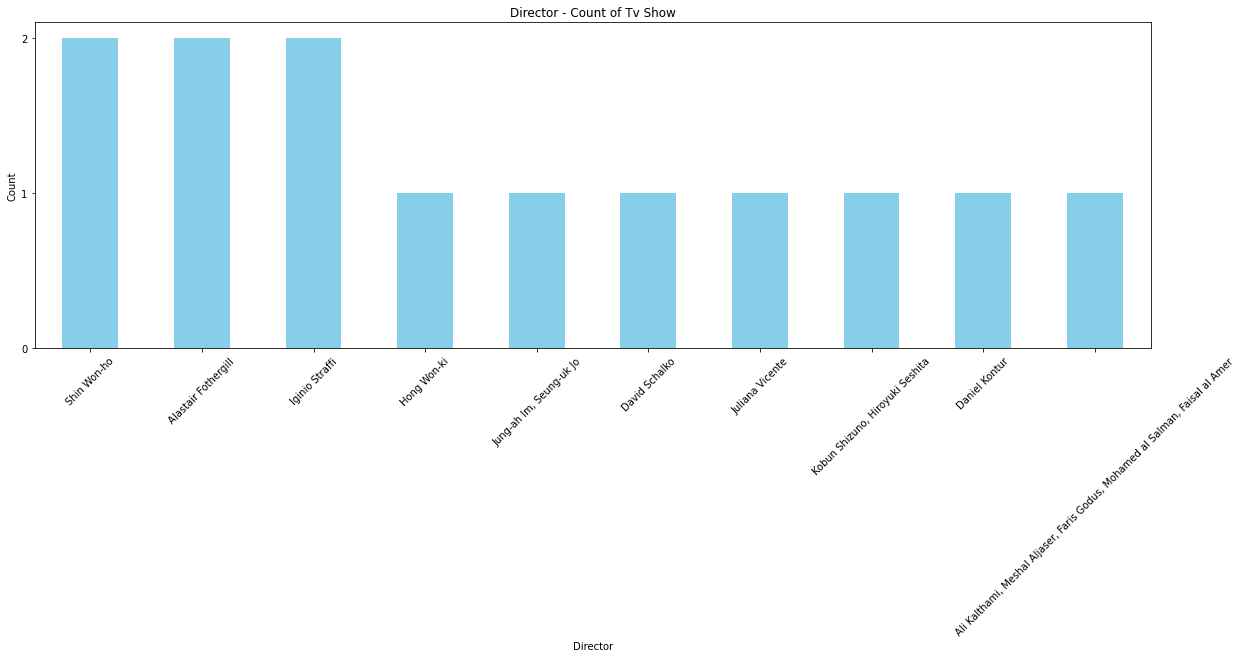

In [29]:
director_counts = show_df['director'].value_counts()

top_directors = director_counts.head(10)

plt.figure(figsize=(20, 6))
top_directors.plot(kind='bar', color='skyblue')
plt.title('Director - Count of Tv Show')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.yticks(range(top_directors.max() + 1))
plt.show()

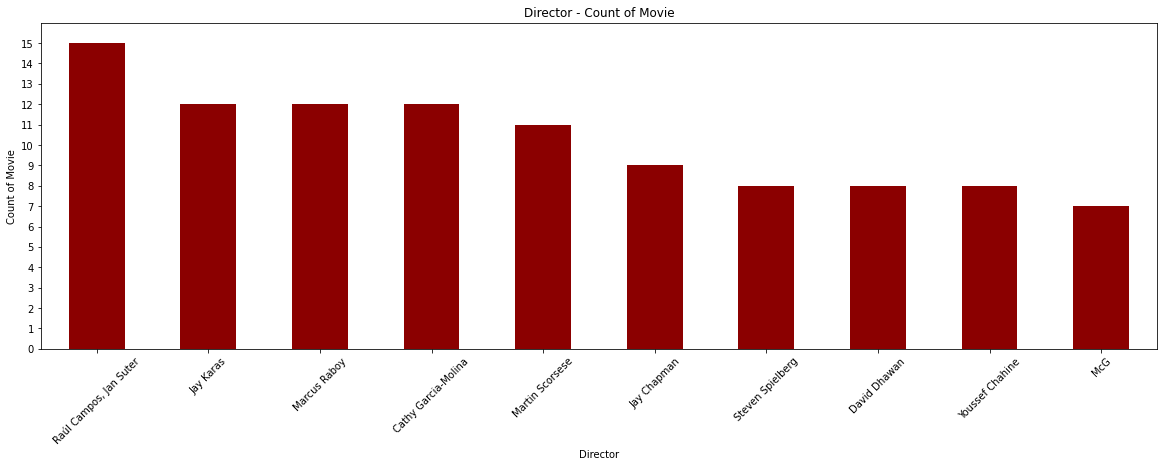

In [30]:
director_counts = movie_df['director'].value_counts()

top_directors = director_counts.head(10)

plt.figure(figsize=(20, 6))
top_directors.plot(kind='bar', color='darkred')
plt.title('Director - Count of Movie')
plt.xlabel('Director')
plt.ylabel('Count of Movie')
plt.xticks(rotation=45)
plt.yticks(range(top_directors.max() + 1))
plt.ylim(0, top_directors.max() + 1)

plt.show()

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
df.shape

(3987, 14)

In [33]:
tfidf = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf.fit_transform(df['description'])

tfidf_matrix.shape

(3987, 12475)

In [34]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [35]:
indices = pd.Series(df.index, index = df.title).drop_duplicates()

In [36]:
indices

title
The Boy Who Harnessed the Wind                                          3
LeapFrog: Sing-along, Read-along                                        4
Mutiny of the Worker Bees                                               5
John Carter                                                             6
Kung Fu Yoga                                                            7
                                                                     ... 
The Titan                                                            6217
Ahista Ahista                                                        6218
Spookley and the Christmas Kittens                                   6219
The Bill Murray Stories: Life Lessons Learned From a Mythical Man    6220
5Gang                                                                6221
Length: 3987, dtype: int64

In [37]:
def get_recommendations(title, cosine_sim = cosine_sim):
    idx = indices[title]
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    sim_scores = sorted(sim_scores, key = lambda x : x[1], reverse = True)
    
    sim_scores = sim_scores[1:11]
    
    movie_indices = [i[0] for i in sim_scores]
    
    return df.title.iloc[movie_indices]

In [38]:
get_recommendations('The Conjuring')

1464    LEGO Marvel Super Heroes: Avengers Reassembled!
672                                     Cemara's Family
65                                           Sinister 2
732                                     Bulbul Can Sing
4579                                 Life of An Outcast
5346                                        The Lodgers
3288                                              Siren
5916                                             Kisaan
4141                                         Our Lovers
3513                               ​​Kuch Bheege Alfaaz
Name: title, dtype: object

In [39]:
df[df['title'].str.contains('conjuring', case = False)]

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre,added_year,added_month
728,6242,s6243,Movie,The Conjuring,James Wan,"Vera Farmiga, Patrick Wilson, Lili Taylor, Ron...",United States,"January 8, 2018",2013,112,"Based on true events, this spine-chiller tells...",Horror Movies,2018,January
4802,1482,s1483,Movie,Conjuring Spirit,Van M. Pham,"Phuong Mai, Quang Su, Hoang Phuc Nguyen, Chi P...",Vietnam,"August 28, 2018",2014,112,"In the wake of her husband's betrayal, a novel...",Horror Movies,2018,August


In [40]:
def clean_data(x):
    return str.lower(x.replace(" ", ""))

In [41]:
df.columns

Index(['Unnamed: 0', 'show_id', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'duration', 'description', 'genre',
       'added_year', 'added_month'],
      dtype='object')

In [42]:
features = ['title','director', 'cast', 'genre', 'description']
df_features = df[features]

In [43]:
df_features = df[features].copy()  

In [44]:
for feature in features:
    df_features[feature] = df_features[feature].apply(clean_data)
    
df_features.head()

,title,director,cast,genre,description
3,theboywhoharnessedthewind,chiwetelejiofor,"maxwellsimba,chiwetelejiofor,aïssamaïga,lilyba...",children,"inspiredbyasciencebook,13-year-oldwilliamkamkw..."
4,"leapfrog:sing-along,read-along",ronmyrick,"juliemaddalena,cindyrobinson",children,"usingrhythmandrhymes,afunkybandandacolorfulcas..."
5,mutinyoftheworkerbees,carlosmorett,"gustavoegelhaaf,alejandrosuárez,bárbaraderegil...",comedies,whenomar'sgrandfatherforceshimtogetajobatatech...
6,johncarter,andrewstanton,"taylorkitsch,lynncollins,samanthamorton,willem...",action,"oneminute,civilwarveteranjohncarterisevadingap..."
7,kungfuyoga,stanleytong,"jackiechan,dishapatani,amyradastur,sonusood,aa...",action,twomismatchedarchaeologistsbattleateamofviciou...


In [46]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' + x['genre'] + ' '+ x['description']

In [47]:
df_features['soup'] = df_features.apply(create_soup, axis = 1); df_features.head()

,title,director,cast,genre,description,soup
3,theboywhoharnessedthewind,chiwetelejiofor,"maxwellsimba,chiwetelejiofor,aïssamaïga,lilyba...",children,"inspiredbyasciencebook,13-year-oldwilliamkamkw...",theboywhoharnessedthewind chiwetelejiofor maxw...
4,"leapfrog:sing-along,read-along",ronmyrick,"juliemaddalena,cindyrobinson",children,"usingrhythmandrhymes,afunkybandandacolorfulcas...","leapfrog:sing-along,read-along ronmyrick julie..."
5,mutinyoftheworkerbees,carlosmorett,"gustavoegelhaaf,alejandrosuárez,bárbaraderegil...",comedies,whenomar'sgrandfatherforceshimtogetajobatatech...,mutinyoftheworkerbees carlosmorett gustavoegel...
6,johncarter,andrewstanton,"taylorkitsch,lynncollins,samanthamorton,willem...",action,"oneminute,civilwarveteranjohncarterisevadingap...","johncarter andrewstanton taylorkitsch,lynncoll..."
7,kungfuyoga,stanleytong,"jackiechan,dishapatani,amyradastur,sonusood,aa...",action,twomismatchedarchaeologistsbattleateamofviciou...,"kungfuyoga stanleytong jackiechan,dishapatani,..."


In [48]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df_features['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [49]:
df_features = df_features.reset_index()
indices = pd.Series(df_features.index, index = df_features['title'])

In [50]:
def get_recommendations2(title, cosine_sim = cosine_sim):
    title = title.replace(' ', '').lower()
    idx = indices[title]
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse= True)
    
    sim_scores = sim_scores[1:11]
    
    movie_indices = [i[0] for i in sim_scores]
    
    return df_features['title'].str.capitalize().iloc[movie_indices]

In [51]:
get_recommendations2('The Conjuring', cosine_sim2)

103                   Insidious
340              Inthetallgrass
2390    Hauntingonfraternityrow
54                  Backcountry
1560                    Nangnak
1839                     Creep2
3837                 Thebinding
204                 Theheretics
254             Thedayofthelord
1530                       Hush
Name: title, dtype: object